<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Diabetes-prediction-using-ANFIS/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from ANFIS import EVOLUTIONARY_ANFIS
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
# New dataset
db = pd.read_csv("./diabetes.csv")

In [ ]:
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Converting Categorical data to integes so that we can apply ML models.

In [ ]:
col = ['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [ ]:
for i in col:
  db[i] = db[i].map(
                    {'Yes':1 ,'No':0})

In [ ]:
db['class'] = db['class'].map(
                    {'Positive':1 ,'Negative':0})

In [ ]:
db['Gender'] = db['Gender'].map(
                    {'Male':1 ,'Female':0})

In [ ]:
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
db.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

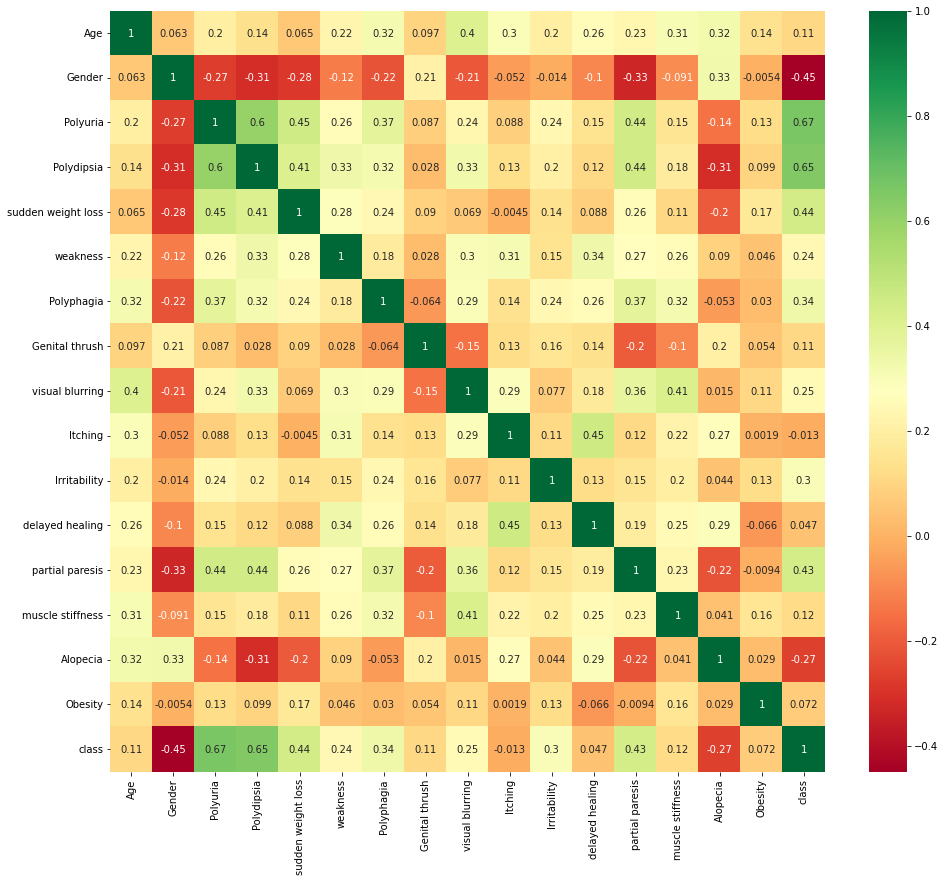

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,14))
cor = db.corr()
p = sns.heatmap(db.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [ ]:
X = db.drop(['class'],axis='columns')
y = db['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y.fit(y_train.values.reshape(-1,1))
y_train = scaler_y.transform(y_train.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))



from ANFIS import EVOLUTIONARY_ANFIS

E_Anfis = EVOLUTIONARY_ANFIS(functions=10,generations=500,offsprings=25,
                             mutationRate=0.2,learningRate=0.2,chance=0.7,ruleComb="simple")

bestParam, bestModel = E_Anfis.fit(X_train,y_train,optimize_test_data=False)

bestParam, bestModel = E_Anfis.fit(X_train,y_train,X_test,y_test,optimize_test_data=True)


0 RMSE is:  0.6264860068968211
1 RMSE is:  0.6264860068968211
2 RMSE is:  0.6264860068968211
3 RMSE is:  0.6264860068968211
4 RMSE is:  0.6264860068968211
5 RMSE is:  0.6264860068968211
6 RMSE is:  0.6264860068968211
7 RMSE is:  0.6264860068968211
8 RMSE is:  0.6264860068968211
9 RMSE is:  0.6263528832179632
10 RMSE is:  0.6254863627743031
11 RMSE is:  0.6243923812770911
12 RMSE is:  0.6243923812770911
13 RMSE is:  0.6243923812770911
14 RMSE is:  0.6243923812770911
15 RMSE is:  0.6243923812770911
16 RMSE is:  0.6243923812770911
17 RMSE is:  0.6243923812770911
18 RMSE is:  0.6237630548955556
19 RMSE is:  0.623703554567214
20 RMSE is:  0.623703554567214
21 RMSE is:  0.623703554567214
22 RMSE is:  0.623703554567214
23 RMSE is:  0.623703554567214
24 RMSE is:  0.623703554567214
25 RMSE is:  0.623703554567214
26 RMSE is:  0.623703554567214
27 RMSE is:  0.6237016327350732
28 RMSE is:  0.6237016327350732
29 RMSE is:  0.6237016327350732
30 RMSE is:  0.6237016327350732
31 RMSE is:  0.62362644535

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
E_Anfis = EVOLUTIONARY_ANFIS(functions=10,generations=500,offsprings=25,
                             mutationRate=0.2,learningRate=0.2,chance=0.7,ruleComb="simple")
pred_train = E_Anfis.predict(X_train,bestParam,bestModel)
pred_train = pred_train.reshape(-1,1)

for x in pred_train:
    if x[0] < 0.75:
        x[0]=0
    else:
        x[0]=1
print('For ANFIS Model')
print('Training Accuracy' , accuracy_score(y_train,pred_train))

pred_test = E_Anfis.predict(X_test,bestParam,bestModel)
pred_test = pred_test.reshape(-1,1)

for x in pred_test:
    if x[0] < 0.75:
        x[0]=0
    else:
        x[0]=1
print('Testing Accuracy' ,accuracy_score( y_test,pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

For ANFIS Model
Training Accuracy 0.804945054945055
Testing Accuracy 0.8141025641025641
[[50 12]
 [17 77]]
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        62
         1.0       0.87      0.82      0.84        94

    accuracy                           0.81       156
   macro avg       0.81      0.81      0.81       156
weighted avg       0.82      0.81      0.82       156



In [ ]:

confusion_matrix(y_test, pred_test)

array([[50, 12],
       [17, 77]])

In [ ]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

[[50 12]
 [17 77]]
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        62
         1.0       0.87      0.82      0.84        94

    accuracy                           0.81       156
   macro avg       0.81      0.81      0.81       156
weighted avg       0.82      0.81      0.82       156



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy_Score = 0.9807692307692307


In [ ]:
#Classification report and confusion matrix of random forest model

print('From Random Forest Method')
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

From Random Forest Method
Accuracy_Score = 0.9807692307692307
[[61  1]
 [ 2 92]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        62
         1.0       0.99      0.98      0.98        94

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

